 ### Building a regression model that tries to predict the estimated cumulative 6 month revenue from a new customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime as dt

In [2]:
order = pd.read_csv('olist_orders_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')


In [3]:
ord_paym = pd.merge (order, customer)
all_data = pd.merge (ord_paym, payment)

In [4]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
all_data['order_delivered_customer_date'] = pd.to_datetime(all_data['order_delivered_customer_date'])

In [5]:
all_data['year_order'] = all_data['order_purchase_timestamp'].dt.year

In [6]:
all_data['customer_unique_id'] = all_data['customer_unique_id'].astype(str)

In [7]:
all_data['month_order'] = all_data['order_purchase_timestamp'].dt.month

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 18 columns):
order_id                         103886 non-null object
customer_id                      103886 non-null object
order_status                     103886 non-null object
order_purchase_timestamp         103886 non-null datetime64[ns]
order_approved_at                103711 non-null object
order_delivered_carrier_date     101998 non-null object
order_delivered_customer_date    100754 non-null datetime64[ns]
order_estimated_delivery_date    103886 non-null object
customer_unique_id               103886 non-null object
customer_zip_code_prefix         103886 non-null int64
customer_city                    103886 non-null object
customer_state                   103886 non-null object
payment_sequential               103886 non-null int64
payment_type                     103886 non-null object
payment_installments             103886 non-null int64
payment_value                    103

In [9]:
all_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'year_order', 'month_order'],
      dtype='object')

In [10]:
all_data.reset_index

<bound method DataFrame.reset_index of                                 order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
103881  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
103882  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
103883  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
103884  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
103885  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status orde

In [11]:
all_data.loc[all_data['customer_unique_id']=='7c396fd4830fd04220f754e42b4e5bff']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017,10
64908,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,44.11,2017,9


In [12]:
all_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,2018,8


In [13]:
most_orders=all_data.loc[all_data['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']
most_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order
29763,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,7,voucher,1,1.27,2017,7
29764,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,9,voucher,1,8.00,2017,7
29765,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,6,voucher,1,8.00,2017,7
29766,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,1,voucher,1,8.03,2017,7
29767,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,10,voucher,1,0.74,2017,7
29768,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,2,voucher,1,8.00,2017,7
29769,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,11,voucher,1,4.00,2017,7
29770,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,3,voucher,1,8.00,2017,7
29771,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,5,voucher,1,8.00,2017,7
29772,67d83bd36ec2c7fb557742fb58837659,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,4,voucher,1,8.00,2017,7


In [ ]:
order_value = all_data.groupby('order_id')['payment_value','payment_sequential'].sum().reset_index().sort_values('payment_value')
order_value.head(100)



In [15]:
order_value.describe()

,payment_value,payment_sequential
count,99440.000000,99440.000000
mean,160.990267,1.141533
std,221.951257,2.780141
min,0.000000,1.000000
25%,62.010000,1.000000
50%,105.290000,1.000000
75%,176.970000,1.000000
max,13664.080000,435.000000


In [16]:
customer_value = all_data.groupby('customer_unique_id')['payment_value', ].sum().reset_index()
customer_value.drop_duplicates(subset=None, keep='first', inplace=False)
customer_value.head()


,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [17]:
customer_value.describe()

,payment_value
count,96095.000000
mean,166.594226
std,231.428912
min,0.000000
25%,63.120000
50%,108.000000
75%,183.530000
max,13664.080000


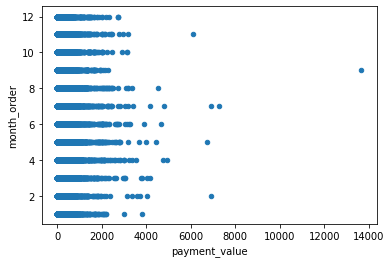

In [18]:
all_data.plot('payment_value', 'month_order', kind = 'scatter')

In [19]:
customer_count = all_data.groupby('customer_unique_id').count()[['order_id']].sum()
customer_count

order_id    103886
dtype: int64

/Users/cristinasandoval/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


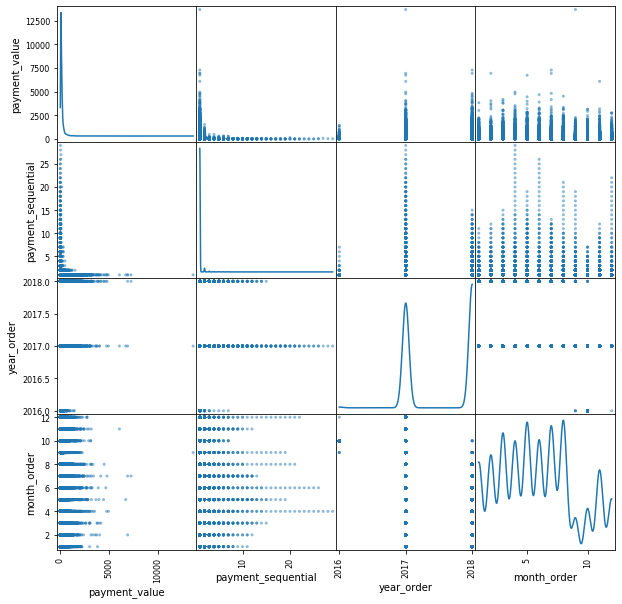

In [20]:
numeric_vars =['payment_value', 'payment_sequential', 'year_order', 'month_order', 'customer_unique_id']
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = scatter_matrix(all_data[numeric_vars], ax=ax, diagonal='kde')

In [21]:
linear_model = smf.ols(formula = 'payment_value ~ month_order + C(year_order) + payment_type', data = all_data)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          9.75e-243
Time:                        04:15:02   Log-Likelihood:            -7.0597e+05
No. Observations:              103886   AIC:                         1.412e+06
Df Residuals:                  103878   BIC:                         1.412e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     159.4814     11.971     13.323      0.000     136.019     182.943
C(year_order)[T.2017]         -18.1148     11.682     -1.551      0.121     -41.012       4.783
C(year_order)[T.2018]         -15.5592     11.748     -1.324      0.185     -38.586       7.467
payment_type[T.credit_card]    18.2086      1.725     10.554      0.000      14.827      21.590
payment_type[T.debit_card]     -3.0401      5.753     -0.528      0.597     -14.316       8.236
payment_type[T.not_defined]  -147.0834    124.900     -1.178      0.239    -391.886      97.719
payment_type[T.voucher]       -79.2232      3.236    -24.481      0.000     -85.566     -72.880
month_order                     0.3794      0.249      1.525      0.127      -0.108       0.867
==============================================================================
Omnibus:                   160562.433   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        264751559.352
Skew:                           9.359   Prob(JB):                         0.00
Kurtosis:                     249.603   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,year_order,month_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08,2017,3
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00,2018,2
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01,2017,8
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16,2018,1


In [23]:
totals['customer_unique_id'] = totals['customer_unique_id'].astype(str)
totals['order_id']= totals['order_id'].astype(str)
totals.drop_duplicates(totals, subset='order_id', keep='first', inplace=False)

NameError: name 'totals' is not defined

In [ ]:
#DataFrame.groupby(self[, by, axis, level, …])
#Aggregate using one or more operations over the specified axis.DataFrame.groupby(self[, by, axis, level, …])
totals=all_data.groupby(by=['customer_unique_id', 'order_id']).sum()[['payment_value']].reset_index()
totals

In [ ]:
totals.columns

In [ ]:
all_data.head()

In [ ]:
export_csv = all_data.to_csv('/Users/cristinasandoval/Desktop/export_data.csv')

In [ ]:
all_data['customer_unique_id'].describe()

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = all_data[all_data.duplicated()]
print(duplicateRowsDF)

In [ ]:
rio = pd.all_data({'order_id': order_id})